# Exam HS21

In [153]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import math
import matplotlib.pyplot as plot

%matplotlib inline

## Exercise 1

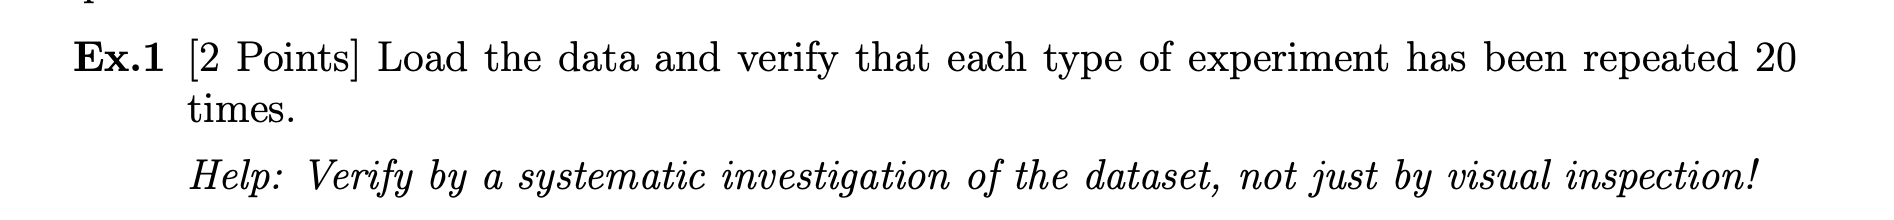

In [154]:
file = "michelson.csv"
file2 = "michelson_binary.csv"
df1 = pd.read_csv(file)
df2 = pd.read_csv(file2)

In [155]:
df1

,Expt,Run,Speed
0,1,1,299850
1,1,2,299740
2,1,3,299900
3,1,4,300070
4,1,5,299930
...,...,...,...
95,5,16,299940
96,5,17,299950
97,5,18,299800
98,5,19,299810


In [156]:
df2

,Expt,Run,Speed,Expt_2,Expt_3,Expt_4,Expt_5
0,1,1,299850,0,0,0,0
1,1,2,299740,0,0,0,0
2,1,3,299900,0,0,0,0
3,1,4,300070,0,0,0,0
4,1,5,299930,0,0,0,0
...,...,...,...,...,...,...,...
95,5,16,299940,0,0,0,1
96,5,17,299950,0,0,0,1
97,5,18,299800,0,0,0,1
98,5,19,299810,0,0,0,1


In [157]:
df.count()

Expt     100
Run      100
Speed    100
dtype: int64

In [158]:
df2.count()

Expt      100
Run       100
Speed     100
Expt_2    100
Expt_3    100
Expt_4    100
Expt_5    100
dtype: int64

Each experiment has 100 observations which is the product of amount of experiments for each type and the amount of repetition for each type. 5 * 20 = 100 for each type. Therefore, each experiment has been repeated 100 times.

# Exercise 2

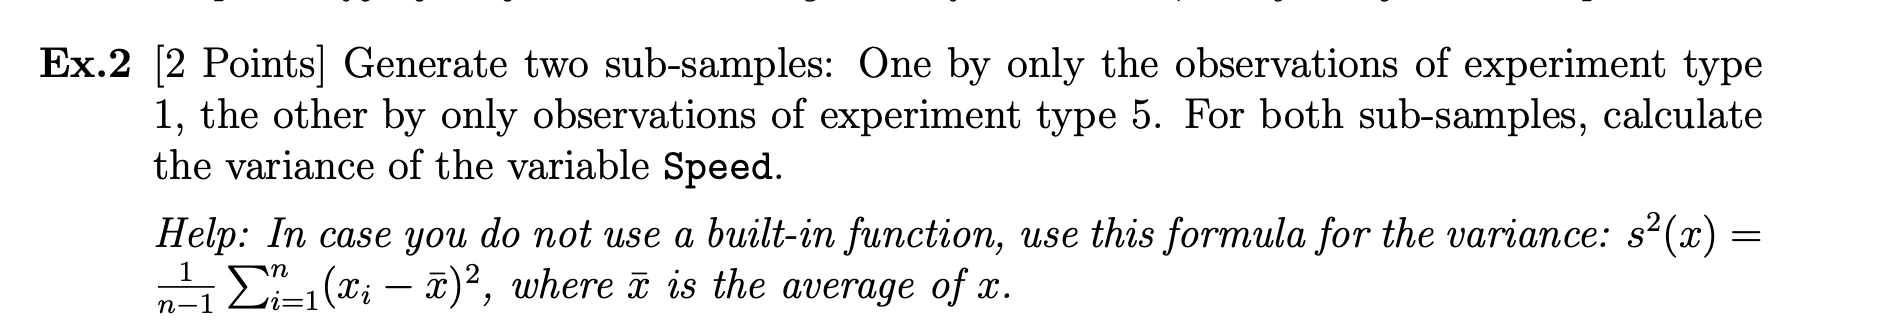

In [159]:
# what? two-sub samples
# by? speed for experiment 1 and 2
sub_expt_1 = df.loc[lambda df : df['Expt'] == 1 ]

In [160]:
sub_expt_5 = df.loc[lambda df : df['Expt'] == 5 ]

In [161]:
sub_expt_1.count()

Expt     20
Run      20
Speed    20
dtype: int64

In [162]:
df_expt_5.count()

Expt     20
Run      20
Speed    20
dtype: int64

In [163]:
sub_e1_speed = sub_expt_1.drop(['Run'], axis=1)
sub_e1_speed

,Expt,Speed
0,1,299850
1,1,299740
2,1,299900
3,1,300070
4,1,299930
5,1,299850
6,1,299950
7,1,299980
8,1,299980
9,1,299880


In [164]:
sub_e5_speed = sub_expt_5.drop(['Run'], axis=1)

In [165]:
sub_e1_speed.describe()

,Expt,Speed
count,20.0,20.000000
mean,1.0,299909.000000
std,0.0,104.926039
min,1.0,299650.000000
25%,1.0,299850.000000
50%,1.0,299940.000000
75%,1.0,299980.000000
max,1.0,300070.000000


In [166]:
# defining function
e1_speed = sub_e1_speed['Speed']
def sigma_2(s):
    mu = s.mean()
    tmp = 0;
    N = len(s) - 1
    for x in range(N):
        tmp = tmp + pow((s[x]-mu),2)
    return tmp/N

In [201]:
var_e1_speed = sigma_2(e1_speed)
var_e1_speed 

10872.578947368422

In [202]:
var_e5_speed = sigma_2(e5_speed)
var_e5_speed

2861.7236842105262

In [168]:
e5_speed = sub_e5_speed['Speed']
e5_speed = e5_speed.reset_index(drop=True)
sigma_2(e5_speed)

2861.7236842105262

In [169]:
# validity check
sub_e1_speed.var()

Expt         0.000000
Speed    11009.473684
dtype: float64

In [170]:
sub_e5_speed.var()

Expt        0.000000
Speed    2939.736842
dtype: float64

## Exercise 3

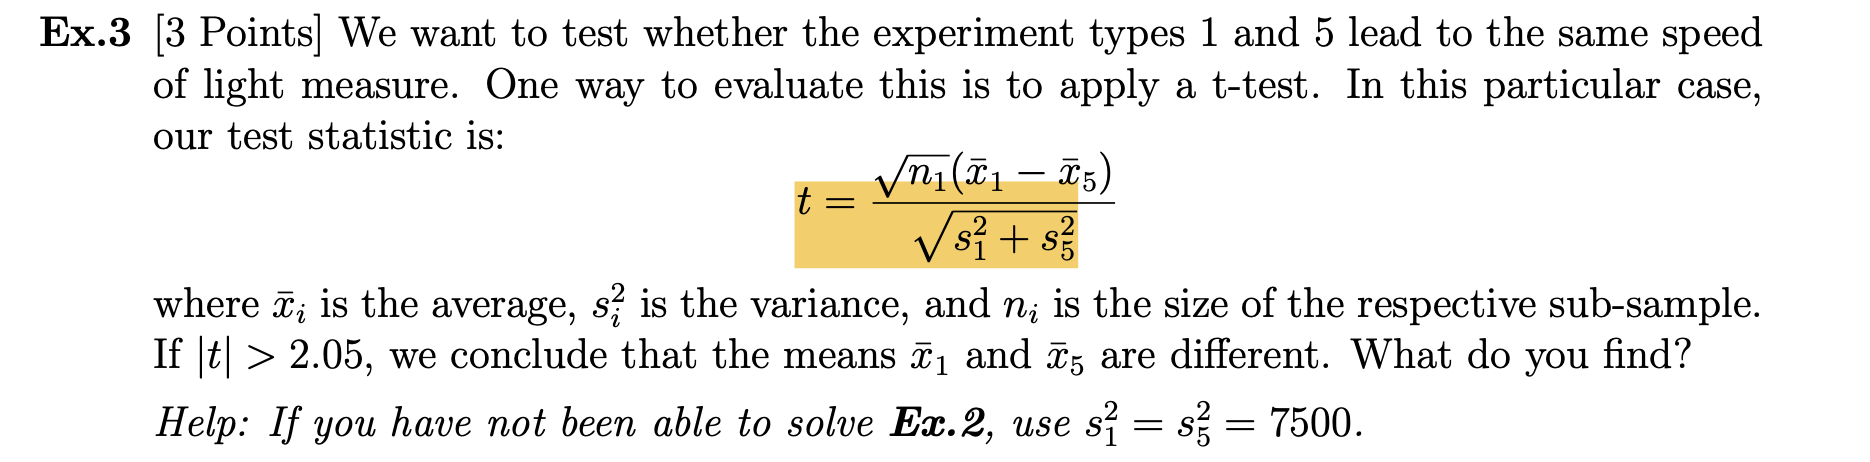

In [203]:
s1_5 = 7500
mu_1 = e1_speed.mean()
mu_5 = e5_speed.mean()
n1 = len(e1_speed)
n5 = len(e5_speed)

def t_test(s1,s2,mu1,mu2,n1):
    return ( (math.sqrt(n1)*(mu1-mu2) )/ (math.sqrt(s1+s2)) )
t = t_test(s1_5, s1_5, mu_1, mu_5,n1)
t2 = t_test(var_e1_speed , var_e5_speed , mu_1, mu_5,n1)
print("Result for t-test, where s1 = s2 = 7500 : {:.4f}".format(t))
print("Result for t-test, where variance for both sub samples are different = {:.4f}".format(2))
print("Therefore means for both sub samples are different")

Result for t-test, where s1 = s2 = 7500 : 2.8299
Result for t-test, where variance for both sub samples are different = 2.0000
Therefore means for both sub samples are different


## Exercise 5

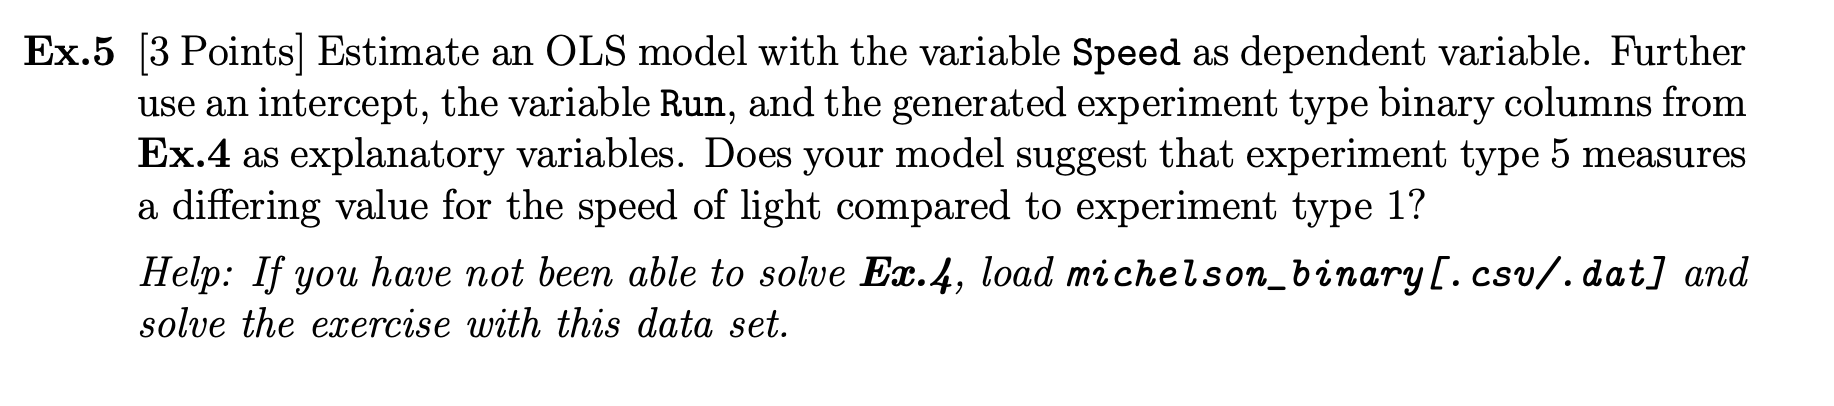

In [171]:
df2

,Expt,Run,Speed,Expt_2,Expt_3,Expt_4,Expt_5
0,1,1,299850,0,0,0,0
1,1,2,299740,0,0,0,0
2,1,3,299900,0,0,0,0
3,1,4,300070,0,0,0,0
4,1,5,299930,0,0,0,0
...,...,...,...,...,...,...,...
95,5,16,299940,0,0,0,1
96,5,17,299950,0,0,0,1
97,5,18,299800,0,0,0,1
98,5,19,299810,0,0,0,1


In [172]:
Y = df2['Speed']
X = df2['Run']
model = sm.OLS(Y,X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Speed   R-squared (uncentered):                   0.768
Model:                            OLS   Adj. R-squared (uncentered):              0.766
Method:                 Least Squares   F-statistic:                              328.3
Date:                Tue, 21 Dec 2021   Prob (F-statistic):                    3.34e-33
Time:                        15:08:36   Log-Likelihood:                         -1329.9
No. Observations:                 100   AIC:                                      2662.
Df Residuals:                      99   BIC:                                      2664.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [176]:
formula = "Speed ~ -1 + Run "
data=df2
result = smf.ols(formula,data).fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Speed   R-squared (uncentered):                   0.768
Model:                            OLS   Adj. R-squared (uncentered):              0.766
Method:                 Least Squares   F-statistic:                              328.3
Date:                Tue, 21 Dec 2021   Prob (F-statistic):                    3.34e-33
Time:                        15:29:43   Log-Likelihood:                         -1329.9
No. Observations:                 100   AIC:                                      2662.
Df Residuals:                      99   BIC:                                      2664.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------